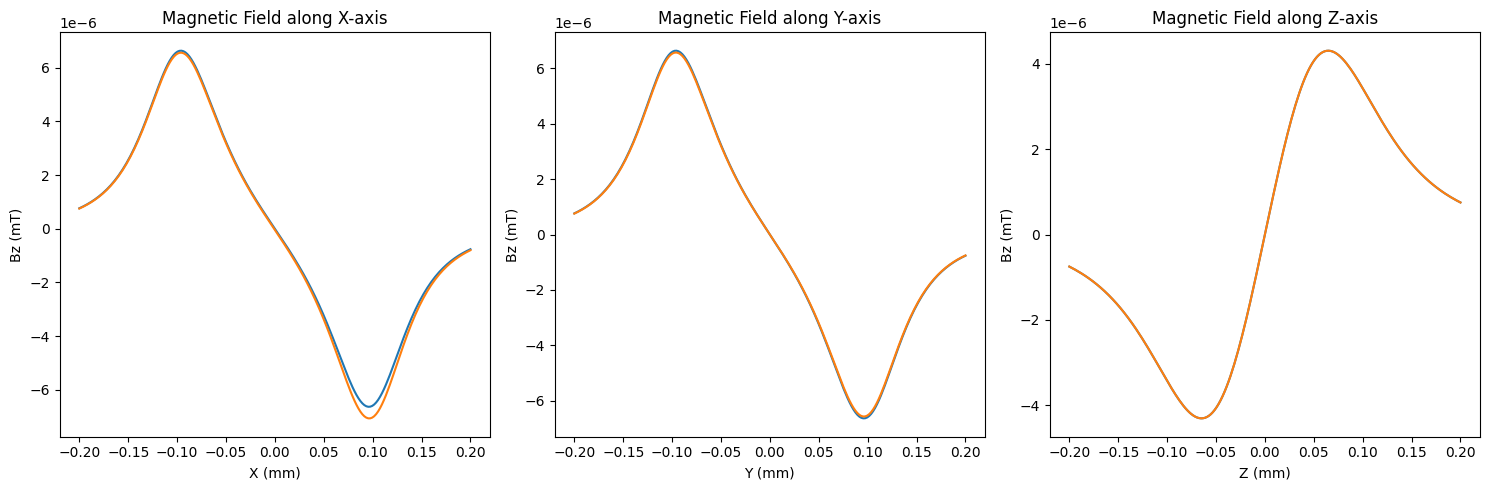

In [48]:
import magpylib as magpy
import numpy as np
import matplotlib.pyplot as plt

def biot_savart_loop(radius, current, observation_point, loop_center, num_segments=100):
    mu_0 = 4 * np.pi * 1e-7  # Tm/A

    # Discretize the loop into small segments
    theta = np.linspace(0, 2 * np.pi, num_segments)
    dl = 2 * np.pi * radius / num_segments  # Length of each segment

    # Positions of the current elements on the loop
    x_prime = loop_center[0] + radius * np.cos(theta)
    y_prime = loop_center[1] + radius * np.sin(theta)
    z_prime = loop_center[2] * np.ones_like(theta)

    B = np.zeros(3)  # Initialize magnetic field vector

    for i in range(num_segments):
        r_prime = np.array([x_prime[i], y_prime[i], z_prime[i]])
        dl_vector = dl * np.array([-np.sin(theta[i]), np.cos(theta[i]), 0])  # Tangential to the loop

        r_vec = np.array(observation_point) - r_prime
        r_mag = np.linalg.norm(r_vec)

        if r_mag != 0:
            dB = (mu_0 * current / (4 * np.pi)) * (np.cross(dl_vector, r_vec) / r_mag**3)
            B += dB

    return B

def method_2(radius, current, r):
    distance = radius  # distance between the centers of the loops

    # Initialize arrays for Bx, By, Bz
    Bx = np.zeros_like(r)
    By = np.zeros_like(r)
    Bz = np.zeros_like(r)

    # Calculate the magnetic field along each axis
    for i, xi in enumerate(r):
        B1 = biot_savart_loop(radius, current, [xi, 0, 0], [0, 0, distance/2])
        B2 = biot_savart_loop(radius, -current, [xi, 0, 0], [0, 0, -distance/2])
        Bx[i] = B1[0] + B2[0]

        B1 = biot_savart_loop(radius, current, [0, xi, 0], [0, 0, distance/2])
        B2 = biot_savart_loop(radius, -current, [0, xi, 0], [0, 0, -distance/2])
        By[i] = B1[1] + B2[1]

        B1 = biot_savart_loop(radius, current, [0, 0, xi], [0, 0, distance/2])
        B2 = biot_savart_loop(radius, -current, [0, 0, xi], [0, 0, -distance/2])
        Bz[i] = B1[2] + B2[2]

    return Bx, By, Bz

def method_1(radius, current, r):
    distance = radius  # distance between the centers of the loops

    # Create the two circular loops
    loop1 = magpy.current.Circle(current=+current, diameter=2*radius)
    loop2 = magpy.current.Circle(current=-current, diameter=2*radius)

    # Position the loops at +distance/2 and -distance/2 along the z-axis
    loop1.move([0, 0, distance/2])
    loop2.move([0, 0, -distance/2])

    # Create a collection of the two loops
    collection = magpy.Collection(loop1, loop2)
    collection.show()

    #hjhjh

    # Calculate the magnetic field along each axis using the collection
    Bx = [collection.getB([xi, 0, 0]) for xi in r]
    By = [collection.getB([0, yi, 0]) for yi in r]
    Bz = [collection.getB([0, 0, zi]) for zi in r]

    # Extract the Bz component (as it is the most significant component for this configuration)
    Bx = np.array(Bx)[:, 0]
    By = np.array(By)[:, 1]
    Bz = np.array(Bz)[:, 2]

    #Name the system
    #anti_helmholtz = magpy.Collection(loop1, loop2)
    return Bx, By, Bz, collection

# Define parameters
radius = 100e-3  # in mm
current = 1  # in A
r = np.linspace(-200, 200, 200)*1e-3  # range in mm

Bx, By, Bz, anti_helmoltz = method_1(radius, current, r)
Bx_, By_, Bz_ = method_2(radius, current, r)

# Plot the magnetic field along each axis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(r, Bx)
plt.plot(r, Bx_)


plt.title('Magnetic Field along X-axis')
plt.xlabel('X (mm)')
plt.ylabel('Bz (mT)')

plt.subplot(1, 3, 2)
plt.plot(r, By)
plt.plot(r, By_)

plt.title('Magnetic Field along Y-axis')
plt.xlabel('Y (mm)')
plt.ylabel('Bz (mT)')

plt.subplot(1, 3, 3)
plt.plot(r, Bz)
plt.plot(r, Bz_)
plt.title('Magnetic Field along Z-axis')
plt.xlabel('Z (mm)')
plt.ylabel('Bz (mT)')

plt.tight_layout()

# Map The field


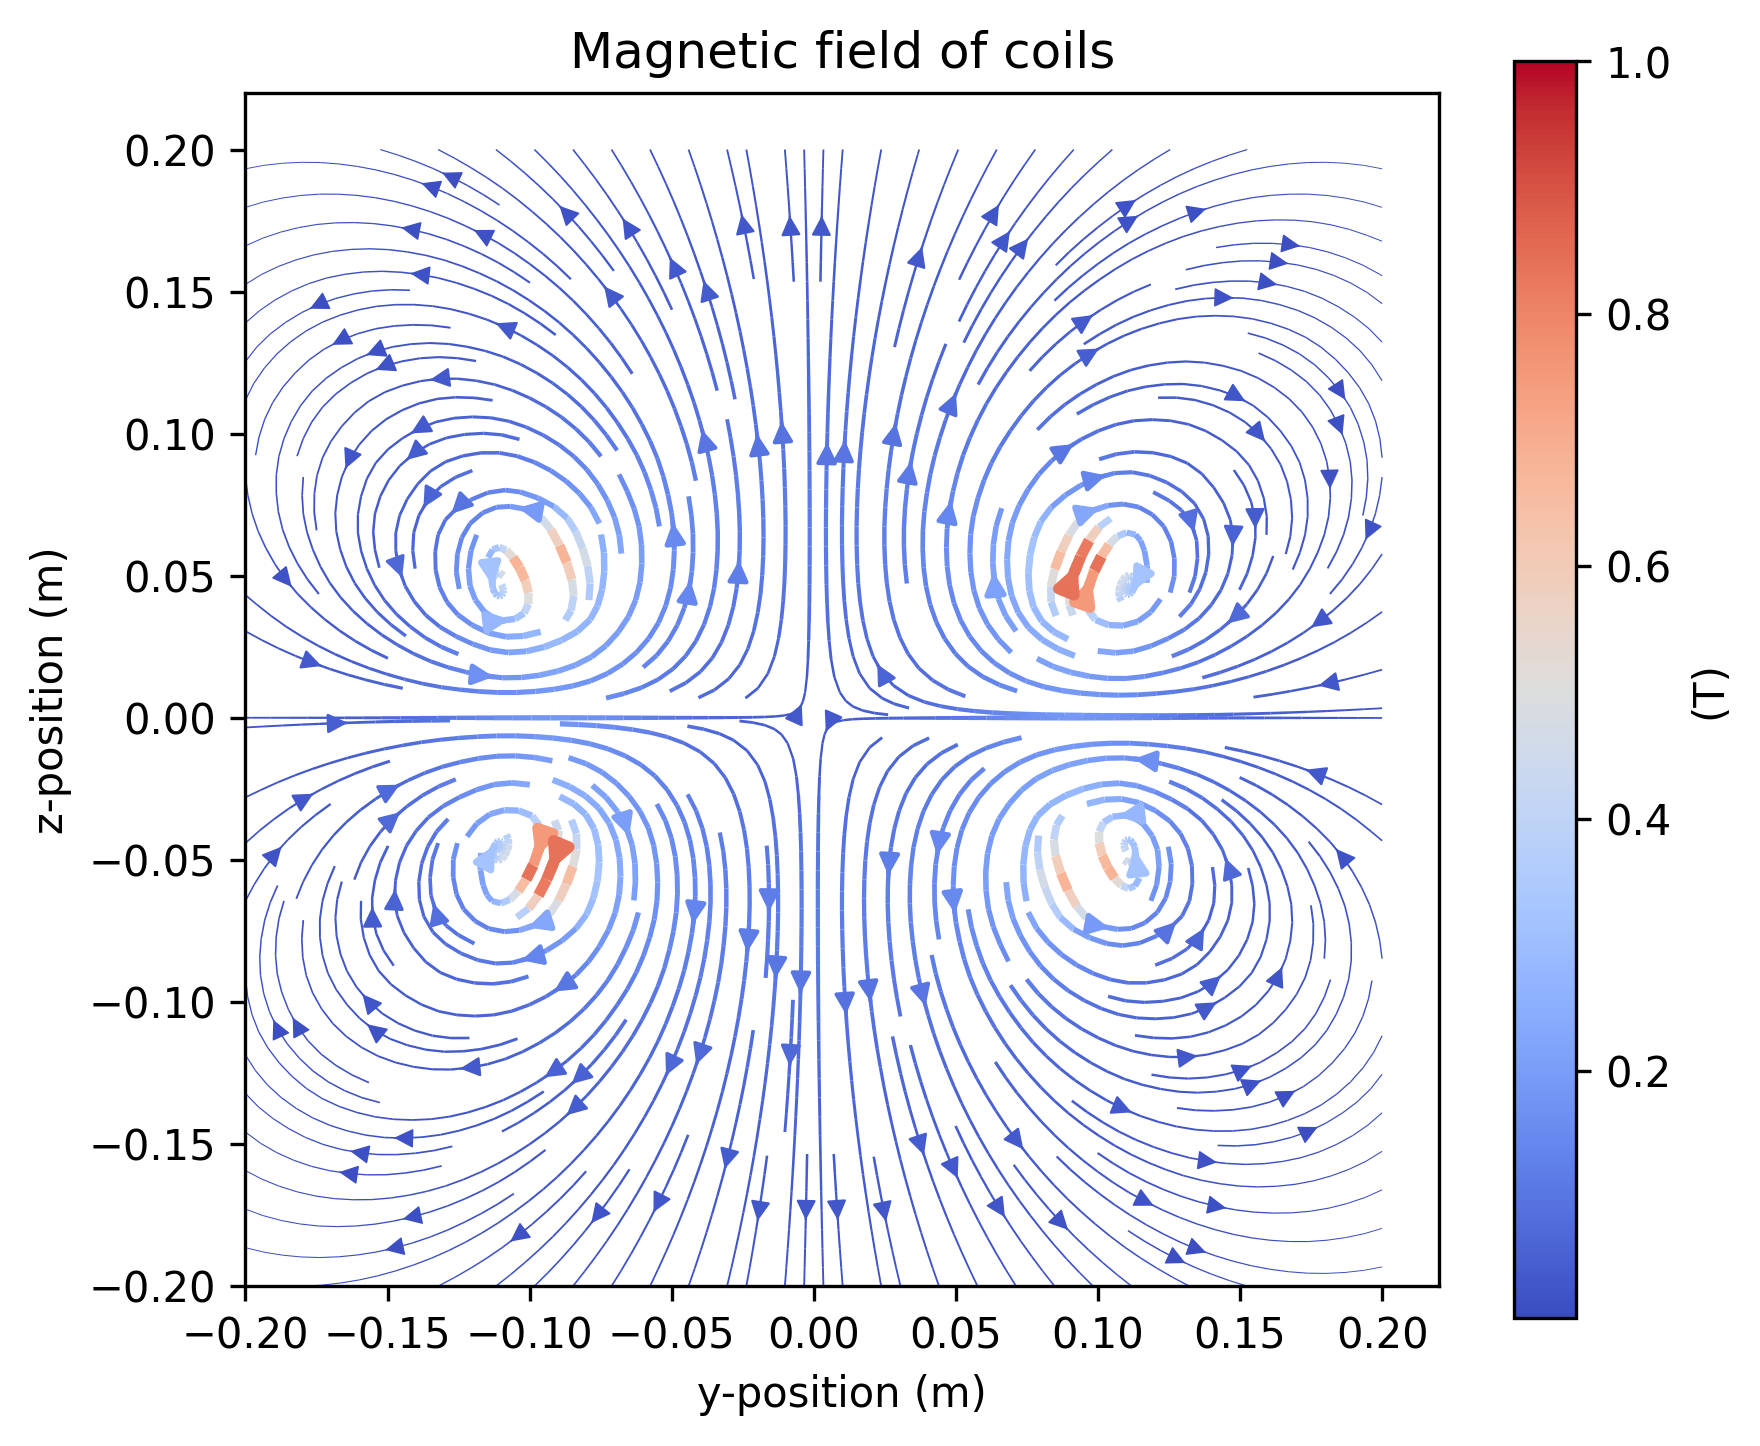

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(6,5),dpi=300)
# grid = np.mgrid[-0:0:1j, -200:200:100j, -200:200:100j].T[:,:,50]*1e-3
# B = magpy.getB(anti_helmoltz, grid)

# _, Y, Z = np.moveaxis(grid, 2, 0)
# _, By, Bz = np.moveaxis(B, 2, 0)

# Bamp = np.linalg.norm(B, axis=1)
# Bamp /= np.amax(Bamp)

# sp = ax.streamplot(Y[0, :, :].T, Z[0, :, :].T, By[0, :, :], Bz[0, :, :], density=2,cmap='coolwarm',
# )


# # Figure styling
# ax.set(
#     title='Magnetic field of Coils',
#     xlabel='y-position (mm)',
#     ylabel='z-position (mm)',
#     aspect=1,
# )
# plt.colorbar(sp.lines, ax=ax, label='(T)')




# plt.tight_layout()
# plt.show()


# Compute field and plot the coil pair field on yz-grid
grid = np.mgrid[0:0:1j, -200:200:20j, -200:200:20j].T[:,:,0]*1e-3
_, Y, Z = np.moveaxis(grid, 2, 0)

B = magpy.getB(anti_helmoltz, grid)
_, By, Bz = np.moveaxis(B, 2, 0)

Bamp = np.linalg.norm(B, axis=2)
Bamp /= np.amax(Bamp)

sp = ax.streamplot(Y, Z, By, Bz, density=2, color=Bamp,
    linewidth=np.sqrt(Bamp)*3, cmap='coolwarm',
)


# Figure styling
ax.set(
    title='Magnetic field of coils',
    xlabel='y-position (m)',
    ylabel='z-position (m)',
    aspect=1,
)
plt.colorbar(sp.lines, ax=ax, label='(T)')

plt.tight_layout()
plt.show()

(100, 100) (100, 100)


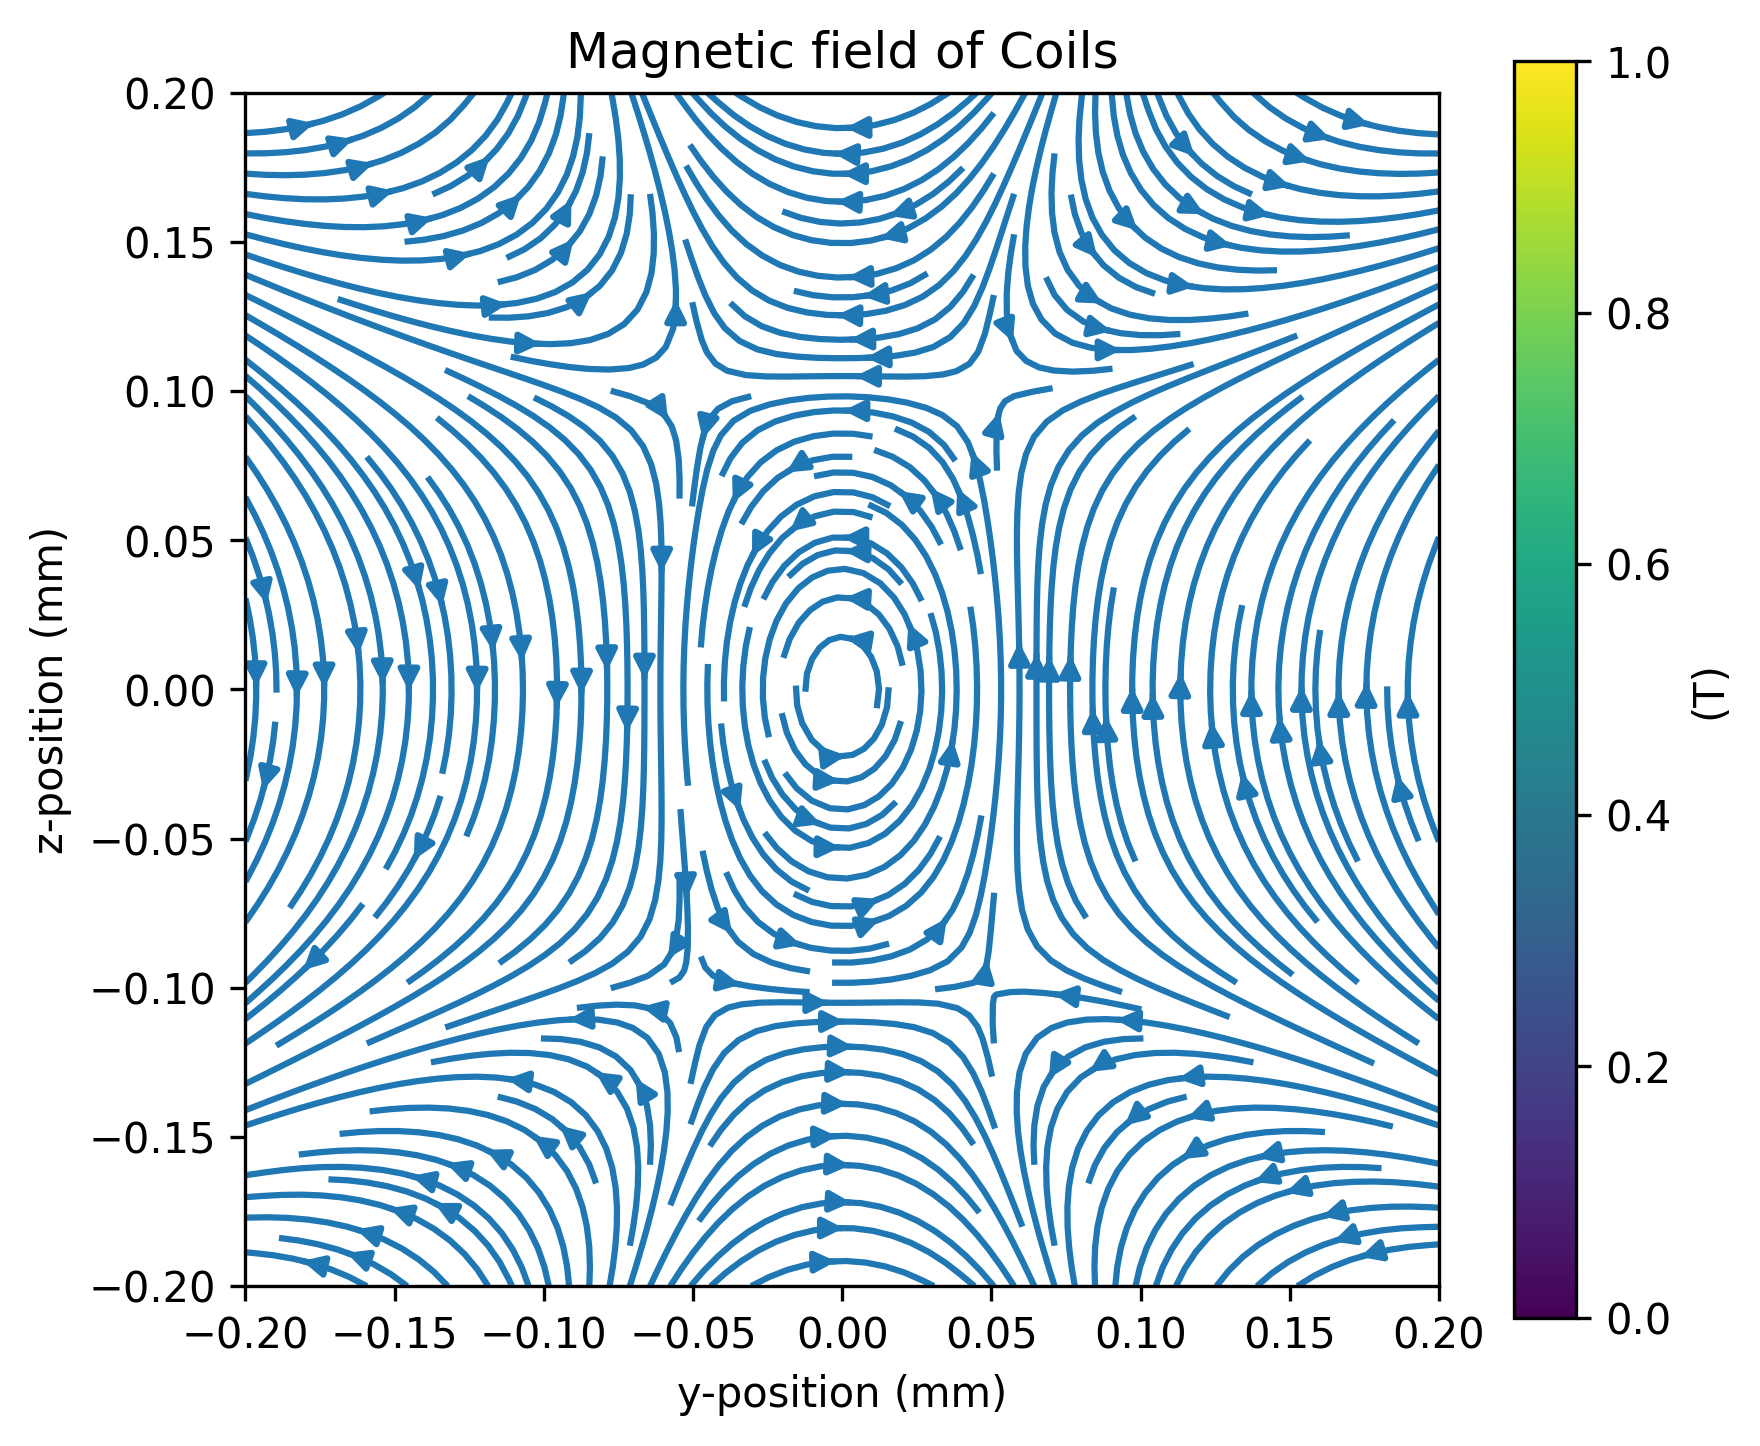

In [105]:

fig, ax = plt.subplots(1, 1, figsize=(6,5),dpi=300)

# Compute field and plot the coil pair field on yz-grid
# grid = np.mgrid[-200:200:100j, -200:200:100j, -200:200:100j].T[:,:,50]*1e-3
r = np.linspace(-200,200, 100)*1e-3
# grid = np.meshgrid(r,r,r)
X, Y, Z = np.meshgrid(r, r, r, indexing='ij')
positions = np.array([X.flatten(), Y.flatten(), Z.flatten()]).T
B = magpy.getB(anti_helmoltz, positions)
Bx = B[:, 0].reshape(X.shape)
By = B[:, 1].reshape(X.shape)
Bz = B[:, 2].reshape(X.shape)

# X,Y,Z = np.meshgrid(r,r,r)
# _, Y, Z = np.moveaxis(grid, 2, 0)
# _, By, Bz = np.moveaxis(B, 2, 0)

Bamp = np.linalg.norm(B, axis=1)
Bamp /= np.amax(Bamp)
print(By[0, :, :].shape, Bz[0, :, :].shape)
sp = ax.streamplot(Y[0, :, :].T, Z[0, :, :].T, By[50, :, :], Bz[50, :, :], density=2,cmap='coolwarm',
)


# Figure styling
ax.set(
    title='Magnetic field of Coils',
    xlabel='y-position (mm)',
    ylabel='z-position (mm)',
    aspect=1,
)
plt.colorbar(sp.lines, ax=ax, label='(T)')




plt.tight_layout()
plt.show()

# Map The Gradient

AxisError: destination: axis 50 is out of bounds for array of dimension 3

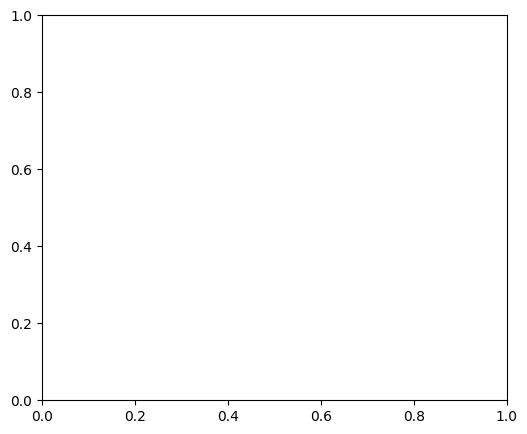

In [85]:

fig, ax = plt.subplots(1, 1, figsize=(6,5))
B_grad=np.gradient(B, axis=2)
_, Byg, Bzg = np.moveaxis(B_grad, 2, 0)


sp = ax.streamplot(
    Y, Z, 
    Byg, Bzg,
    density=2,
    color=np.linalg.norm(B_grad, axis=2),
    cmap='coolwarm',)

plt.colorbar(sp.lines, ax=ax, label='[T/m]')
plt.tight_layout()


